<a href="https://colab.research.google.com/github/MengOonLee/Deep_learning/blob/master/TensorFlow2/Tutorial/Getting_started_TensorFlow2/Validation_regularisation_callbacks/Regularisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%writefile pip_install.sh
#!/bin/bash
pip install -qU pip wheel
pip install -qU numpy pandas matplotlib
pip install -qU scikit-learn

In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.1


# Validation, Regularisation and Callbacks

## Coding tutorials
#### [1. Validation sets](#coding_tutorial_1)
#### [2. Model regularisation](#coding_tutorial_2)
#### [3. Introduction to callbacks](#coding_tutorial_3)
#### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(128, activation='tanh'))
model.add(Dense(2))

opt = Adam(learning_rate=0.05)
model.compile(optimizer=opt, loss='mse', metrics=['mape'])

history = model.fit(inputs, targets, validation_split=0.2)

print(history.history.keys()) # dict_keys(['loss', 'mape', 'val_loss', 'val_mape'])

In [ ]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

model.fit(X_train, y_train, validation_data=(X_test, y_test))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

model.fit(X_train, y_train, validation_data=(X_val, y_val))

#### Load the data

In [2]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset["DESCR"])
print("\n", diabetes_dataset.keys())

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
# Save the input and target variables
data = diabetes_dataset["data"]
targets = diabetes_dataset["target"]

In [4]:
# Normalise the target data will make clearer training curves
targets = (targets - targets.mean(axis=0)) / targets.std()

In [5]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(
    data, targets, test_size=0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


#### Train a feedforward neural network model

In [7]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation="relu", 
            input_shape=(train_data.shape[1],)),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(1)])
    return model

model = get_model()

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               1408      
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 1)                

In [7]:
# Compile the model
model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"])

In [8]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs=100,
    validation_split=0.15, batch_size=64, verbose=False)

In [9]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.9066 - mae: 0.7348 - 34ms/epoch - 17ms/step


[0.9065636396408081, 0.7348026037216187]

#### Plot the learning curves

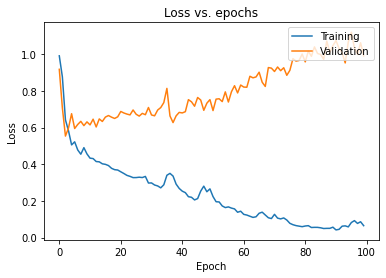

In [10]:
# Plot the training and validation loss
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss vs. epochs")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Training", "Validation"], loc="upper right")
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation="relu", 
        # kernel_regularizer=tf.keras.regularizers.l2(0.001)
        # kernel_regularizer=tf.keras.regularizers.l1(0.005)
        kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.005, l2=0.001),
        bias_regularizer=tf.keras.regularizers.l2(0.001)),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adadelta", 
    loss="binary_crossentropy", metrics=["acc"])
model.fit(inputs, targets, validation_split=0.25)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adadelta",
    loss="binary_crossentropy",
    metrics=["acc"])

model.fit(inputs, targets, validation_split=0.25) # Training mode, with dropout
model.evaluate(val_inputs, val_targets) # Testing mode, no dropout
model.predict(test_inputs) # Testing mode, no dropout

#### Adding regularisation with weight decay and dropout

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd),
            input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd)),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [12]:
# Re-build the model with weight decay and dropout layers
model = get_regularised_model(1e-5, 0.3)
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               1408      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 128)              

In [13]:
# Compile the model
model.compile(optimizer="adam", 
    loss="mse", metrics=["mae"])

In [14]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs=100,
    validation_split=0.15, batch_size=64, verbose=False)

In [15]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.6597 - mae: 0.6185 - 34ms/epoch - 17ms/step


[0.659687876701355, 0.6185497045516968]

#### Plot the learning curves

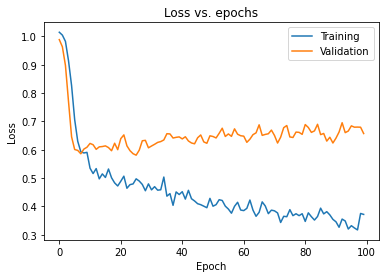

In [16]:
# Plot the training and validation loss
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss vs. epochs")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Training", "Validation"], loc="upper right")
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

In [ ]:
from tensorflow.keras.callbacks import Callback

class my_callback(Callback):
    
    def on_train_begin(self, logs=None):
        # Do something at the start of training
        
    def on_train_batch_begin(self, batch, logs=None):
        # Do something at the start of every batch iteration
        
    def on_epoch_end(self, epoch, logs=None):
        # Do something at the end of every epoch
        
history = model.fit(X_train, y_train, epochs=5, callbacks=[my_callback()])

#### Example training callback

In [10]:
# Write a custom callback
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
    
    def on_train_begin(self, logs=None):
        print("Starting training....")
        
    def on_epoch_begin(self, epoch, logs=None):
        print(f"Starting epoch {epoch}")
        
    def on_train_batch_begin(self, batch, logs=None):
        print(f"Training: Starting batch {batch}")
        
    def on_train_batch_end(self, batch, logs=None):
        print(f"Training: Finished batch {batch}")
        
    def on_epoch_end(self, epoch, logs=None):
        print(f"Finished epoch {epoch}")
        
    def on_train_end(self, logs=None):
        print("Finished training!")

In [7]:
# Re-build the model
model = get_regularised_model(wd=1e-5, rate=0.3)
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               1408      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 128)              

In [8]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae'])

#### Train the model with the callback

In [11]:
# Train the model, with some of the data reserved for validation
model.fit(train_data, train_targets, epochs=3, batch_size=128,
    verbose=False, callbacks=[TrainingCallback()])

Starting training....
Starting epoch 0
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 0
Starting epoch 1
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 1
Starting epoch 2
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 2
Finished training!


In [12]:
# Write a custom callback
from tensorflow.keras.callbacks import Callback

class TestingCallback(Callback):
    
    def on_test_begin(self, logs=None):
        print("Starting testing....")
        
    def on_test_batch_begin(self, batch, logs=None):
        print(f"Testing: Starting batch {batch}")
        
    def on_test_batch_end(self, batch, logs=None):
        print(f"Testing: Finished batch {batch}")
        
    def on_test_end(self, logs=None):
        print("Finished testing!")

In [13]:
# Evaluate the model
model.evaluate(test_data, test_targets, verbose=False,
    callbacks=[TestingCallback()])

Starting testing....
Testing: Starting batch 0
Testing: Finished batch 0
Testing: Starting batch 1
Testing: Finished batch 1
Finished testing!


[0.9547341465950012, 0.7944281697273254]

In [14]:
# Write a custom callback
from tensorflow.keras.callbacks import Callback

class PredictionCallback(Callback):
    
    def on_predict_begin(self, logs=None):
        print("Starting prediction...")
        
    def on_predict_batch_begin(self, batch, logs=None):
        print(f"Prediction: Starting batch {batch}")
        
    def on_predict_batch_end(self, batch, logs=None):
        print(f"Prediction: Finished batch {batch}")
        
    def on_predict_end(self, logs=None):
        print("Finished prediction!")

In [15]:
# Make predictions with the model
model.predict(test_data, verbose=False, 
    callbacks=[PredictionCallback()])

Starting prediction...
Prediction: Starting batch 0
Prediction: Finished batch 0
Prediction: Starting batch 1
Prediction: Finished batch 1
Finished prediction!


array([[ 0.04287307],
       [ 0.05279499],
       [-0.01102234],
       [ 0.05299075],
       [-0.01514771],
       [ 0.0186532 ],
       [ 0.0397133 ],
       [ 0.00469594],
       [-0.00070528],
       [ 0.01551226],
       [ 0.02997304],
       [ 0.0180812 ],
       [-0.02146234],
       [ 0.03764322],
       [ 0.00175971],
       [ 0.00880721],
       [ 0.06790894],
       [-0.00997912],
       [ 0.05932409],
       [ 0.04928559],
       [ 0.06718791],
       [ 0.05459341],
       [ 0.02787827],
       [ 0.04796148],
       [ 0.03177996],
       [ 0.01419861],
       [-0.01316767],
       [ 0.0404562 ],
       [ 0.06388135],
       [ 0.02043135],
       [ 0.03886363],
       [ 0.04755959],
       [ 0.04199915],
       [ 0.00787045],
       [ 0.0527617 ],
       [-0.01168034],
       [ 0.00376877],
       [ 0.06166543],
       [ 0.00737908],
       [ 0.06027671],
       [ 0.06672195],
       [ 0.04647419],
       [ 0.02847528],
       [ 0.05000895],
       [ 0.04902585]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Conv1D(16, 5, activation='relu', input_shape=(128, 1)),
    MaxPooling1D(4),
    Flatten(),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(
    # monitor='val_loss'
    monitor='val_accuracy',
    patience=5,
    min_delta=0.01,
    mode='max'
)

model.fit(X_train, y_train, validation_split=0.2, epochs=100,
    callbacks=[early_stopping])

#### Re-train the models with early stopping

In [18]:
# Re-train the unregularized model
unregularised_model = get_model()
unregularised_model.compile(optimizer='adam', loss='mse')
unreg_history = unregularised_model.fit(train_data, train_targets, epochs=100,
    validation_split=0.15, batch_size=64, verbose=False,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

# Evaluate the model on the test set
unregularised_model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.5379 - 16ms/epoch - 8ms/step


0.537878692150116

In [19]:
# Re-train the regularised model
regularised_model = get_regularised_model(1e-8, 0.2)
regularised_model.compile(optimizer='adam', loss='mse')
reg_history = regularised_model.fit(train_data, train_targets, epochs=100,
    validation_split=0.15, batch_size=64, verbose=False,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

# Evaluate the model on the test set
regularised_model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.5309 - 17ms/epoch - 9ms/step


0.5309394598007202

#### Plot the learning curves

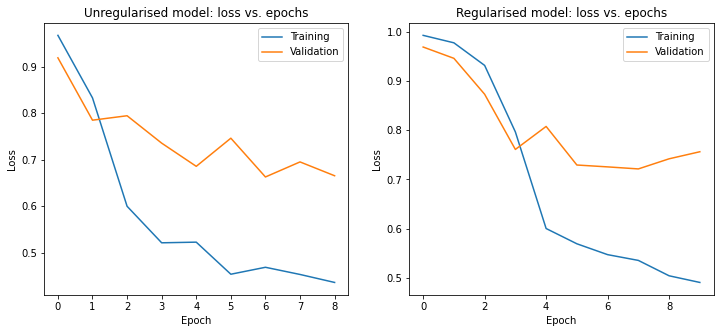

In [20]:
# Plot the training and validation loss
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)
plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)
plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()